In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None)
from utils.mlss import ivpack, aer, r_base, fixest
from utils.mlss import (
    train_lgb,
    train_random_forest,
    linear_prediction,
    quadratic_prediction,
    construct_instrument,
    cross_fit_instruments,
    split_sample_ml,
    anderson_rubin,
    feols,
    hyperparameter_search,
    linear_prediction,
    quadratic_prediction,
    quadratic_prediction_with_interaction,
    parse_ar
)

import seaborn as sns
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm

C:\WBG\anaconda\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\WBG\anaconda\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\WBG\anaconda\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
Unable to determine R home: [WinError 2] The system cannot find the file specified
Unable to determine R library path: Command 

In [3]:
#df_cases = pd.read_stata("C:\\Users\\wb570559\\india_project\\monthly_mortality\\data\\tempdata_yearly_juris_pol.dta")

In [4]:
#df_cases_all = pd.DataFrame()

In [5]:
import glob
import os
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wb570559\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wb570559\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# data prep -
# 1. yearly pollution

def cleaner(txt_file):
    
    text = txt_file
    text = re.sub(r"(&[a-zA-Z]*;)", " ", text)  # the txt files had some unwanted text like &rsquo; this line removes such text
    text = text.lower()
    
    # remove punctuation and numbers from the string
    punctuations = '''!()[]{};:'"\,<>./?@#$%^&*_~=+`|0123456789 '''  # removing punctuations except hyphens
    
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")
            
    
    text = text.replace(" st ", " ")
    text = text.replace(" nd ", " ")
    text = text.replace(" rd ", " ")
    text = text.replace(" th ", " ")
    text = text.replace("hellip", " ")
    text = text.replace("rsquo", " ")
    text = text.replace("ldquo", " ")
    text = text.replace("rdquo", " ")
    text = text.replace("ndash", " ")
    text = text.replace("--", " ")

    
    return text



def cleaner2(txt_file):
    
    text = txt_file
    text = re.sub(r"(&[a-zA-Z]*;)", " ", text)  # the txt files had some unwanted text like &rsquo; this line removes such text
    text = text.lower()
    
    # remove punctuation and numbers from the string
    punctuations = '''!()[]{};:'"\,<>./?@#$%^&*_~=+`| '''  # removing punctuations except hyphens
    
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")
            
    
    text = text.replace(" st ", " ")
    text = text.replace(" nd ", " ")
    text = text.replace(" rd ", " ")
    text = text.replace(" th ", " ")
    text = text.replace("hellip", " ")
    text = text.replace("rsquo", " ")
    text = text.replace("ldquo", " ")
    text = text.replace("rdquo", " ")
    text = text.replace("ndash", " ")
    text = text.replace("--", " ")

    
    return text

In [7]:
#1. yearly pollution

In [ ]:
df_yp = pd.read_stata(r"C:\Users\wb570559\github\india_air_pollution\data\temp_data\tempdata_yearly_air_olexiy_mhml.csv")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\WBG\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-043fee23fd0e>", line 1, in <module>
    df_yp = pd.read_stata(r"C:\Users\wb570559\github\india_air_pollution\data\temp_data\tempdata_monthly_air_olexiy_mhml.csv")
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py", line 2022, in read_stata
    return reader.read()
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py", line 1744, in read
    data = self._do_convert_missing(data, convert_missing)
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py", line 1835, in _do_convert_missing
    data[col] = replacements[col]
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py", line 3655, in __setitem__
    self._set_item(key, val

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\WBG\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-043fee23fd0e>", line 1, in <module>
    df_yp = pd.read_stata(r"C:\Users\wb570559\github\india_air_pollution\data\temp_data\tempdata_monthly_air_olexiy_mhml.csv")
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py", line 2022, in read_stata
    return reader.read()
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py", line 1744, in read
    data = self._do_convert_missing(data, convert_missing)
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\io\stata.py", line 1835, in _do_convert_missing
    data[col] = replacements[col]
  File "C:\Users\wb570559\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py", line 3655, in __setitem__
    self._set_item(key, val

In [9]:
df_yp.head()

year  district  EnvCase  NotGreenCaseMedian  GreenCaseMedian  \
0  1981  adilabad      0.0                 0.0              0.0   
1  1982  adilabad      0.0                 0.0              0.0   
2  1983  adilabad      0.0                 0.0              0.0   
3  1984  adilabad      0.0                 0.0              0.0   
4  1985  adilabad      0.0                 0.0              0.0   

   NotGreenCaseMean  GreenCaseMean        bc        du      oc14      oc16  \
0               0.0            0.0  0.669629  7.681814  6.042810  6.906069   
1               0.0            0.0  0.688545  6.189452  6.294034  7.193182   
2               0.0            0.0  0.702234  6.076287  6.193717  7.078534   
3               0.0            0.0  0.705676  8.079552  6.452436  7.374212   
4               0.0            0.0  0.722163  8.687986  6.311423  7.213054   

       oc18       pm14       pm16       pm18       so2       so4        ss  \
0  7.769327  17.850203  18.713461  19.576719  1.716873  1.862868  1.593082   
1  8.092330  16.492880  17.392029  18.291176  1.711326  1.968308  1.352540   
2  7.963351  16.308130  17.192947  18.077763  1.934828  2.005068  1.330823   
3  8.295989  18.768862  19.690639  20.612415  1.931654  2.083694  1.447505   
4  8.114686  19.504919  20.406551  21.308182  2.078061  2.239056  1.544290   

   NumJudges  JudgeWoman  JudgeGrad  JudgePostGrad  GovtPetitioner  \
0        0.0         0.0        0.0            0.0             0.0   
1        0.0         0.0        0.0            0.0             0.0   
2        0.0         0.0        0.0            0.0             0.0   
3        0.0         0.0        0.0            0.0             0.0   
4        0.0         0.0        0.0            0.0             0.0   

   GovtRespondent  Appeal  Constitutional  lsa_vec1  lsa_vec2  lsa_vec3  \
0             0.0     0.0             0.0       0.0       0.0       0.0   
1             0.0     0.0             0.0       0.0       0.0       0.0   
2             0.0     0.0             0.0       0.0       0.0       0.0   
3             0.0     0.0             0.0       0.0       0.0       0.0   
4             0.0     0.0             0.0       0.0       0.0       0.0   

   lsa_vec4  lsa_vec5  lsa_vec6  lsa_vec7  lsa_vec8  lsa_vec9  lsa_vec10  \
0       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0        0.0   

   lsa_vec11  lsa_vec12  lsa_vec13  lsa_vec14  lsa_vec15  lsa_vec16  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   lsa_vec17  lsa_vec18  lsa_vec19  lsa_vec20  lsa_vec21  lsa_vec22  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   lsa_vec23  lsa_vec24  lsa_vec25  Onelsa_vec1  Onelsa_vec2  Onelsa_vec3  \
0        0.0        0.0        0.0          1.0          1.0          1.0   
1        0.0        0.0        0.0          1.0          1.0          1.0   
2        0.0        0.0        0.0          1.0          1.0          1.0   
3        0.0        0.0        0.0          1.0          1.0          1.0   
4        0.0        0.0        0.0          1.0          1.0          1.0   

   Onelsa_vec4  

In [10]:
df_yp = df_yp[df_yp["year"].notnull()]

df_yp["districtXyear"] = df_yp["district"].astype(str) + "_" + df_yp["year"].astype(str) 
df_yp["year_"] = df_yp["year"].apply(lambda x : "year"+str(cleaner2(str(x))))

df_yp["district"] = df_yp["district"].apply(lambda x : str(cleaner(x)))

district_dummies = pd.get_dummies(df_yp["district"],drop_first=True)
year_dummies = pd.get_dummies(df_yp["year_"],drop_first=True)

year_cols = list(year_dummies.columns)
district_cols = list(district_dummies.columns)

df_yp = pd.concat([df_yp,year_dummies,district_dummies], axis=1)



In [11]:
characteristic_cols_main = ["JudgeWoman", "JudgePostGrad"]

In [12]:
d2v_list = ["d2v_vec1","d2v_vec2","d2v_vec3","d2v_vec4","d2v_vec5",
           "d2v_vec6","d2v_vec7","d2v_vec8","d2v_vec9","d2v_vec10",
           "d2v_vec11","d2v_vec12","d2v_vec13","d2v_vec14","d2v_vec15",
           "d2v_vec16","d2v_vec17","d2v_vec18","d2v_vec19","d2v_vec20",
           "d2v_vec21","d2v_vec22","d2v_vec23","d2v_vec24","d2v_vec25"]

In [13]:
lsa_list = ["lsa_vec1","lsa_vec2","lsa_vec3","lsa_vec4","lsa_vec5",
           "lsa_vec6","lsa_vec7","lsa_vec8","lsa_vec9","lsa_vec10",
           "lsa_vec11","lsa_vec12","lsa_vec13","lsa_vec14","lsa_vec15",
           "lsa_vec16","lsa_vec17","lsa_vec18","lsa_vec19","lsa_vec20",
           "lsa_vec21","lsa_vec22","lsa_vec23","lsa_vec24","lsa_vec25"]

In [14]:
pollution_vars = [
                  "bc","du","oc14","oc16","oc18","pm14","pm16","pm18","so2","so4","ss"
                 ]

In [15]:
#vectype = ["d2v", "lsa"]
vectype = ["d2v"]

In [16]:
covs_no_dum = ["GovtRespondent","Appeal","Constitutional", "CaseDummy"] 
covs_orig = covs_no_dum+year_cols+district_cols

In [17]:
#df_yp_ji = pd.read_stata(r"C:\Users\wb570559\mlss_replication\processed_data\tempdata_yearly_juris_pol_judge_identity.dta")

In [18]:
#all_cols = list(df_yp.columns)

In [19]:
#judge_identity_vars = [ele for ele in all_cols if "jidentity" in ele]

In [20]:
#judge_identity_vars[:5]

In [21]:
#global fwl

def fit_mlss_rf(seed, covs=None):
    rng = np.random.RandomState(seed)
    sample = (rng.rand(len(df)) > 0.5).astype(int)

    state = np.random.get_state()
    np.random.seed(seed)
    data, fwl_data = split_sample_ml(
        df,
        sample,
        characteristic_cols,
        "FracGreenCases",
        outcomevar,
        covariates=covs,
        training=train_random_forest,
        name="rf",
        tune=False,
        clf=searched_clf,
    )
    #fwl = fwl_data
    np.random.set_state(state)

    if covs is not None:
        fwl_data.index = data.index
        #print("abc")
        return analyze(fwl_data, df, sample, "rf")
    else:
        #print("pqr")
        return analyze(data, df, sample, "rf")

def analyze(data, df, sample, name):
    s0 = df.loc[sample == 0].index
    s1 = df.loc[sample == 1].index
    if "y" in data.columns:
        coef, fit = feols(f"y ~ 1 | d ~ z", data=data,)
        return {
            "coef": coef,
            "fit": fit,
            "ar1": anderson_rubin(data.loc[s0], "y ~ d", "~z",)[0],
            "ar2": anderson_rubin(data.loc[s1], "y ~ d", "~z",)[0],
        }
    else:
        coef, fit = feols(f"{outcomevar} ~ 1 | FracGreenCases ~ {name}_inst", data=data,)
        return {
            "coef": coef,
            "fit": fit,
            "ar1": anderson_rubin(
                data.loc[s0], f"{outcomevar} ~ FracGreenCases", f"~{name}_inst",
            )[0],
            "ar2": anderson_rubin(
                data.loc[s1], f"{outcomevar} ~ FracGreenCases", f"~{name}_inst",
            )[0],
            "r2": data[["FracGreenCases", f"{name}_inst"]].corr().iloc[0, 1] ** 2,
        }
  

def fit_mlss(seed, trainer, covs=None):
    rng = np.random.RandomState(seed)
    sample = (rng.rand(len(df)) > 0.5).astype(int)

    data, fwl_data = split_sample_ml(
        df,
        sample,
        characteristic_cols,
        "FracGreenCases",
        outcomevar,
        covariates=covs,
        training=trainer,
        name="lgb",
        tune=False,
    )

    if covs is not None:
        fwl_data.index = data.index
        fwl_data.to_csv("fwl.csv")
        return analyze(fwl_data, df, sample, "lgb")
    else:
        return analyze(data, df, sample, "lgb")

plot_kwargs = dict(ls="", capthick=1, capsize=4,)


def plot_result(res, y, ax=None):
    coef, wald_se = pd.DataFrame(res["coef"]).iloc[1, :2]

    numbers, shape = parse_ar(res["ar1"])
    #if shape == "interval":
    lb, ub = numbers
        
    numbers, shape = parse_ar(res["ar2"])
    #if shape == "interval":
    lb = max(lb, numbers[0])
    ub = min(ub, numbers[1])
        
    lb = max(lb, -1000)
    ub = min(ub, 1000)

    (plt if ax is None else ax).errorbar(
        y=y, x=coef, xerr=1.96 * wald_se, marker=".", **plot_kwargs, color="b"
    )
    (plt if ax is None else ax).errorbar(
        y=y + 0.1,
        x=coef,
        xerr=np.array([[coef - lb], [ub - coef]]),
        **plot_kwargs,
        color="r",
    )

    if "r2" in res:
        (plt if ax is None else ax).text(
            y=y + 0.2, x=1, s=f'{100*res["r2"]:.1f}%', fontsize="small"
        )

def fit_and_plot(seed, ax, precompute=None, **kwargs):
    if precompute is not None:
        [lgb_res, rf_res, linear_res, quad_res, quad_inter_res] = precompute
    else:
        lgb_res = fit_mlss(seed, trainer=train_lgb, **kwargs)
        rf_res = fit_mlss_rf(seed, **kwargs)
        linear_res = fit_mlss(seed, trainer=linear_prediction, **kwargs)
        quad_res = fit_mlss(seed, trainer=quadratic_prediction, **kwargs)
        quad_inter_res = fit_mlss(
            seed, trainer=quadratic_prediction_with_interaction, **kwargs
        )

    plot_result(lgb_res, 5, ax=ax)
    plot_result(rf_res, 4, ax=ax)
    plot_result(linear_res, 3, ax=ax)
    plot_result(quad_res, 2, ax=ax)
    plot_result(quad_inter_res, 1, ax=ax)

    return [lgb_res, rf_res, linear_res, quad_res, quad_inter_res]

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: bc, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: bc
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.002685   0.002258  1.1891 0.234421    
fit_FracGreenCases -0.023923   0.011662 -2.0514 0.040237 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.318039   Adj

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: bc, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: bc
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.002072   0.002389  0.867497 0.385678    
fit_FracGreenCases -0.020077   0.017780 -1.129200 0.258827    
GovtRespondent      0.029540   0.015434  1.914000 0.055638 .  
Appeal            

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

TSLS estimation, Dep. Var.: du, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: du
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.008294   0.013226 -0.6271 0.530599    
fit_FracGreenCases  0.230431   0.068299  3.3739 0.000742 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 1.8627   Adj. 

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: du, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: du
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value    Pr(>|t|)    
(Intercept)         0.017385   0.013992  1.242500 2.14047e-01    
fit_FracGreenCases  0.675039   0.104132  6.482500 9.20000e-11 ***
GovtRespondent     -0.016235   0.090392 -0.179607 8.57463e-01    
Appeal

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: oc14, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: oc14
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.029638   0.014723  2.0130 0.044127 *  
fit_FracGreenCases -0.273826   0.076030 -3.6016 0.000317 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 2.0735   A

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: oc14, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: oc14
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.060314   0.015553  3.878100 0.000106 ***
fit_FracGreenCases  0.186286   0.115749  1.609400 0.107544    
GovtRespondent     -0.086683   0.100476 -0.862717 0.388302    
Appeal        

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

TSLS estimation, Dep. Var.: oc16, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: oc16
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.033897   0.016825  2.0147 0.043946 *  
fit_FracGreenCases -0.313268   0.086881 -3.6057 0.000312 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 2.3695   A

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: oc16, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: oc16
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.068703   0.017772  3.865700 0.000111 ***
fit_FracGreenCases  0.205848   0.132269  1.556300 0.119654    
GovtRespondent     -0.092429   0.114816 -0.805014 0.420820    
Appeal        

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

TSLS estimation, Dep. Var.: oc18, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: oc18
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.038088   0.018934  2.0116 0.044272 *  
fit_FracGreenCases -0.351848   0.097773 -3.5986 0.000321 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 2.6665   A

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: oc18, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: oc18
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.077249   0.020000  3.862400 0.000113 ***
fit_FracGreenCases  0.231051   0.148850  1.552200 0.120619    
GovtRespondent     -0.128233   0.129210 -0.992436 0.320995    
Appeal        

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

TSLS estimation, Dep. Var.: pm14, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: pm14
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|) 
(Intercept)         0.038188   0.038968  0.979985 0.327103 
fit_FracGreenCases -0.194728   0.201229 -0.967697 0.333206 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 5.488   Adj. 

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: pm14, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: pm14
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.066443   0.041205  1.612500 0.106867    
fit_FracGreenCases  0.440131   0.306667  1.435200 0.151242    
GovtRespondent      0.220502   0.266204  0.828321 0.407497    
Appeal        

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: pm16, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: pm16
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|) 
(Intercept)         0.042336   0.040877  1.0357 0.300347 
fit_FracGreenCases -0.232761   0.211082 -1.1027 0.270168 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 5.7567   Adj. R2: -

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: pm16, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: pm16
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.075112   0.043222  1.737800 0.082257 .  
fit_FracGreenCases  0.463852   0.321677  1.442000 0.149322    
GovtRespondent      0.199638   0.279234  0.714952 0.474646    
Appeal        

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: pm18, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: pm18
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|) 
(Intercept)         0.046635   0.042771  1.0903 0.275575 
fit_FracGreenCases -0.272714   0.220866 -1.2347 0.216936 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 6.0236   Adj. R2: -

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: pm18, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: pm18
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.083709   0.045223  1.851000 0.064178 .  
fit_FracGreenCases  0.485176   0.336572  1.441500 0.149450    
GovtRespondent      0.212819   0.292163  0.728427 0.466359    
Appeal        

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

TSLS estimation, Dep. Var.: so2, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: so2
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|) 
(Intercept)        -0.001322   0.008932 -0.147993 0.882349 
fit_FracGreenCases  0.054678   0.046123  1.185500 0.235837 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 1.2579   Adj. R

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: so2, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: so2
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)        -0.020342   0.009445 -2.153800 0.031264 *  
fit_FracGreenCases -0.152094   0.070291 -2.163800 0.030493 *  
GovtRespondent      0.176297   0.061017  2.889300 0.003864 ** 
Appeal          

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

TSLS estimation, Dep. Var.: so4, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: so4
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)         0.011139   0.013636  0.816881 0.414005    
fit_FracGreenCases -0.117575   0.070416 -1.669700 0.094988 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 1.9204

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: so4, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: so4
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|)    
(Intercept)        -0.017008   0.014432 -1.178500 0.238610    
fit_FracGreenCases -0.433673   0.107408 -4.037600 0.000054 ***
GovtRespondent      0.206111   0.093236  2.210600 0.027071 *  
Appeal          

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-22-4c2dff58000a>:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

TSLS estimation, Dep. Var.: ss, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: ss
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|) 
(Intercept)         0.002847   0.001949  1.460800 0.144090 
fit_FracGreenCases -0.007651   0.010064 -0.760248 0.447114 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.274472   Adj. R

R[write to console]: Variables 'jidentity_aakankshavyas', 'jidentity_anjanamishra' and 306 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: ss, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: ss
Observations: 23,840 
Standard-errors: Standard 
                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         0.003989   0.002057  1.9392  0.052489 .  
fit_FracGreenCases  0.037195   0.015309  2.4297  0.015119 *  
GovtRespondent      0.115904   0.013289  8.7221 < 2.2e-16 ***
Appeal              0.

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#########----------ar_tsls empty!--------###########
passing----------------------------
#########----------ar_tsls2 empty!--------###########


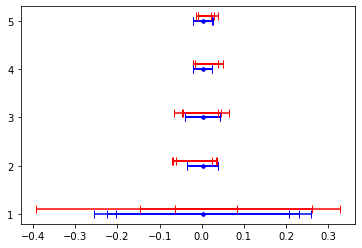

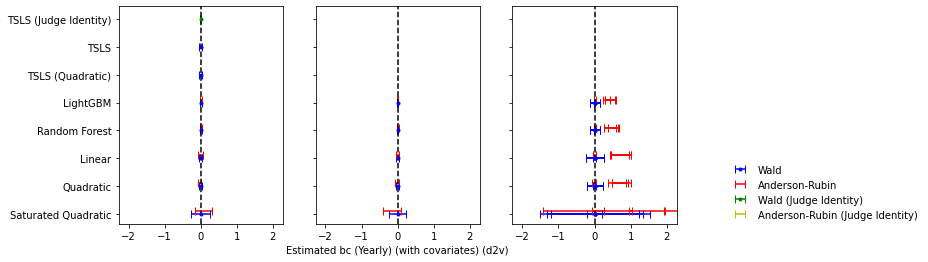

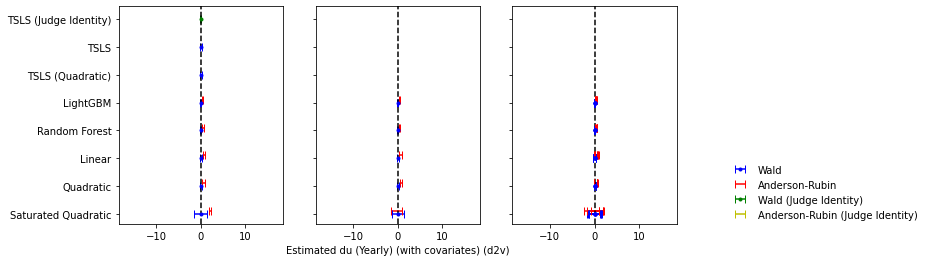

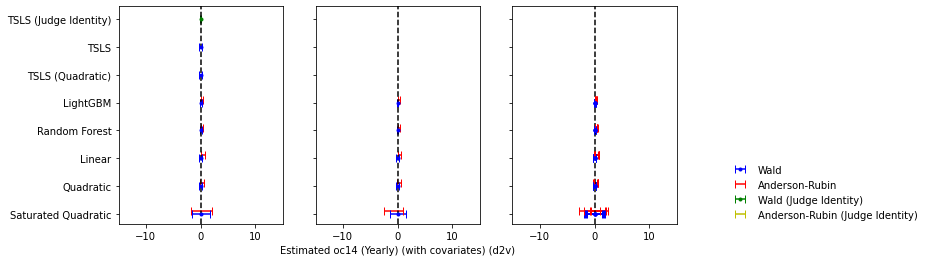

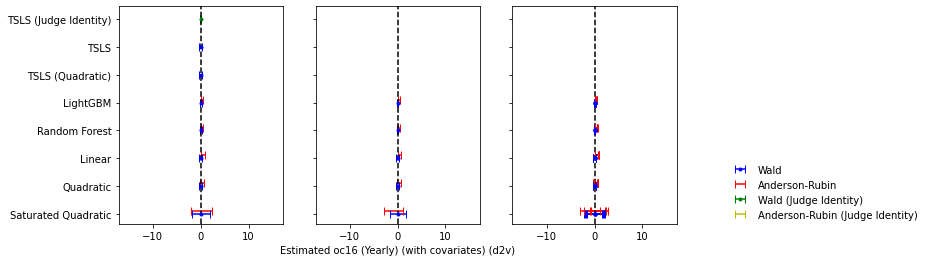

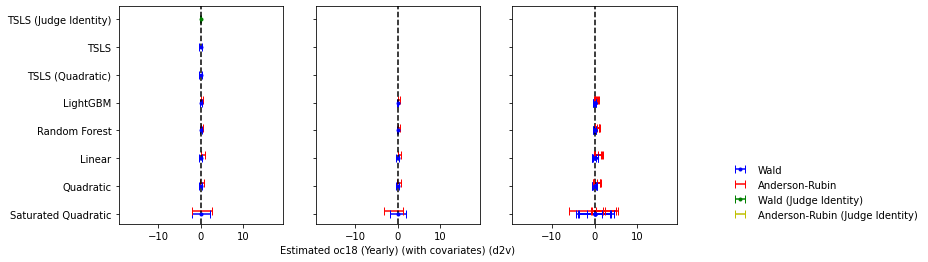

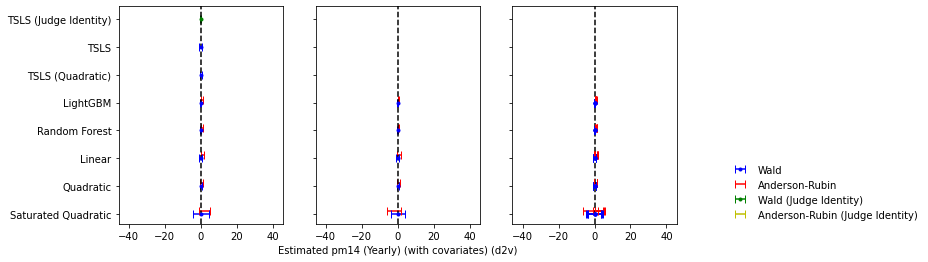

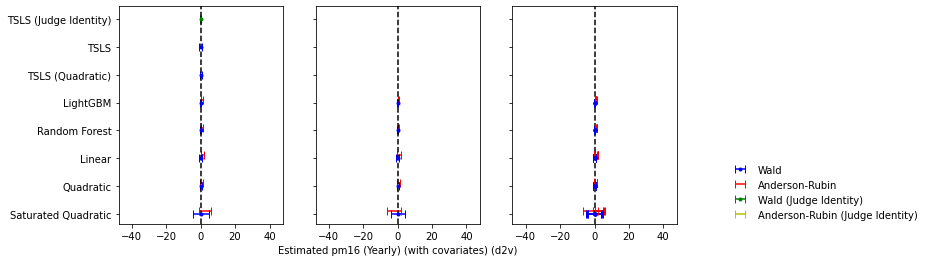

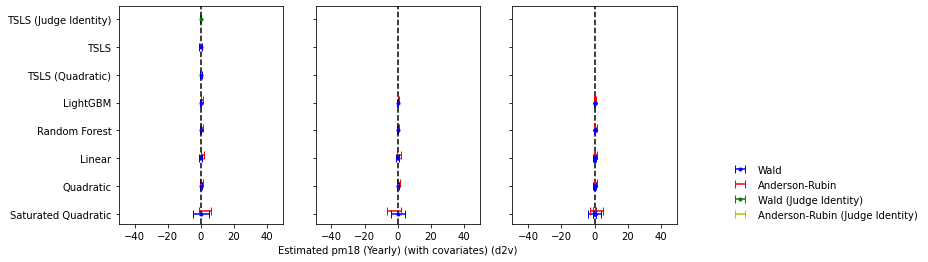

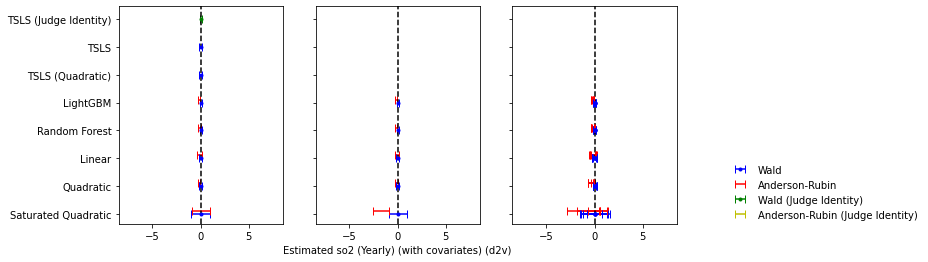

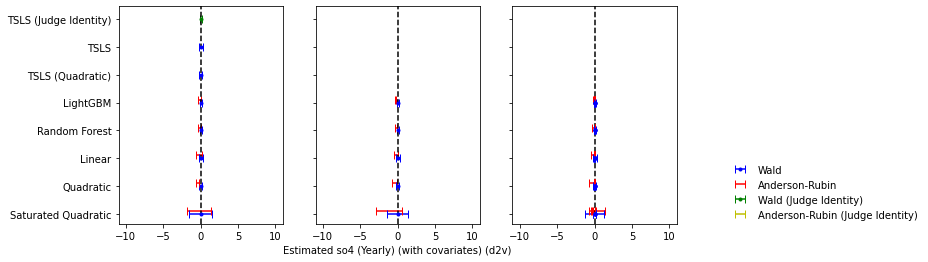

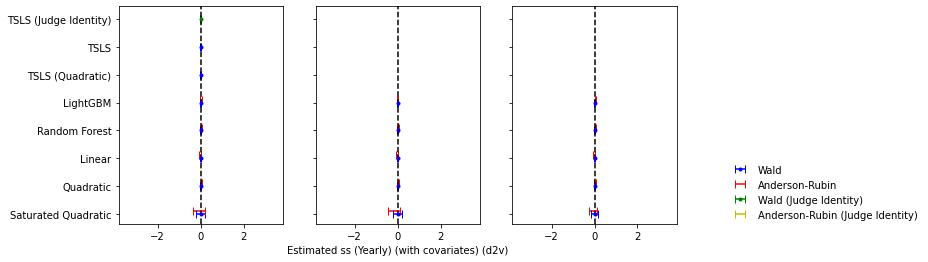

In [22]:
faulty_ar_tsls = []
faulty_ar_tsls2 = []

for outcomevar in pollution_vars:
    #flag_ = 0
    
    suffix_ar_tsls = ""
    suffix_ar_tsls2 = ""
    for tmvect in vectype:
        #tmvect="d2v"
        
        if(tmvect=="d2v"):
            
            characteristic_cols_orig = characteristic_cols_main + d2v_list
            
        if(tmvect=="lsa"):
            
            characteristic_cols_orig = characteristic_cols_main + lsa_list
            
        df = df_yp
        
        ##########
        #shashank - 
        #y-var should be notnull while residualising
        df = df[df[outcomevar].notnull()]
        all_cols = list(df.columns)
        judge_identity_vars = [ele for ele in all_cols if "jidentity" in ele]
        df_judges_temp = df[judge_identity_vars]
        df_judges_temp = df_judges_temp.fillna(0)
        df = df.fillna(df_judges_temp) # nan judge identity columns to be filled with 0
        
        faulty = []

        for ele in list(df.columns):

            desc = list(df[ele].unique())

            if len(desc) == 1:
                
                faulty.append(ele)
                
        df = df.drop(faulty, axis=1)
        df = df.reset_index(drop=True)
        meanoutcome = df[outcomevar].mean()
        stdoutcome = df[outcomevar].std()
        ##########
        
        characteristic_cols = list(pd.Series(characteristic_cols_orig)[~pd.Series(characteristic_cols_orig).isin(pd.Series(faulty))])
        covs = list(pd.Series(covs_orig)[~pd.Series(covs_orig).isin(pd.Series(faulty))])
        
        year_cols_temp = list(pd.Series(year_cols)[pd.Series(year_cols).isin(pd.Series(covs))])
        district_cols_temp = list(pd.Series(district_cols)[pd.Series(district_cols).isin(pd.Series(covs))])
        
        residualise_on = year_cols_temp+district_cols_temp
        
        # residualising - 
        
        model = sm.OLS(df[outcomevar],df[residualise_on])
        results = model.fit()
        residuals = results.resid
        
        df[outcomevar] = residuals
        
        remove_year_dist = year_cols+district_cols
        
        covs = list(pd.Series(covs)[~pd.Series(covs).isin(pd.Series(remove_year_dist))])
        
        #df2 = df_yp_ji
        
        df2 = df
        
        ##########
        #shashank - 
        #y-var should be notnull while residualising
        df2 = df2[df2[outcomevar].notnull()]
        df2 = df2.reset_index(drop=True)
        #meanoutcome = df2[outcomevar].mean()
        #stdoutcome = df2[outcomevar].std()
        all_cols = list(df2.columns)
        judge_identity_vars = [ele for ele in all_cols if "jidentity" in ele]
        characteristic_cols2 = judge_identity_vars
        ##########
        
        for c in characteristic_cols:
            df[c + "2"] = df[c] ** 2
        quadratics = [c + "2" for c in characteristic_cols]
        
        for c in characteristic_cols2:
            df2[c + "2"] = df2[c] ** 2
        quadratics2 = [c + "2" for c in characteristic_cols2]
        
        
        tsls_simple = feols(
            f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols)}", data=df,
        )[0]
        
        tsls_simple2 = feols(
            f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols2)}", data=df2,
        )[0]
        
        ar_tsls_simple = anderson_rubin(
            df, f"{outcomevar} ~ FracGreenCases", f"~{'+'.join(characteristic_cols)}",
        )[0]
        
        ar_tsls_simple2 = anderson_rubin(
            df2, f"{outcomevar} ~ FracGreenCases", f"~{'+'.join(characteristic_cols2)}",
        )[0]

        tsls_simple_quad = feols(
            f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
            data=df,
        )[0]
        
        ar_tsls_simple_quad = anderson_rubin(
            df,
            f"{outcomevar} ~ FracGreenCases",
            f"~{'+'.join(characteristic_cols + quadratics)}",
        )[0]
        

        
        
        ##
        print(feols(
            f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
            data=df,
        )[1])

        tsls = feols(
            f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols)}",
            data=df,
        )[0]
        
        tsls2 = feols(
            f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols2)}",
            data=df2,
        )[0]
        


        #print(tsls.T.iloc[:2, 1])

        ar_tsls = anderson_rubin(
            df,
            f"{outcomevar} ~ FracGreenCases + {'+'.join(covs)}",
            f"~{'+'.join(characteristic_cols)} + {'+'.join(covs)}",
        )[0]
        
        ar_tsls2 = anderson_rubin(
            df2,
            f"{outcomevar} ~ FracGreenCases + {'+'.join(covs)}",
            f"~{'+'.join(characteristic_cols2)} + {'+'.join(covs)}",
        )[0]
        
        
        tsls_quad = feols(
            f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
            data=df,
        )[0]
        
        print(
            feols(
                f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
                data=df,
            )[1]
        )
         
            
        ar_quad = anderson_rubin(
            df,
            f"{outcomevar} ~ FracGreenCases + {'+'.join(covs)}",
            f"~{'+'.join(characteristic_cols + quadratics)} + {'+'.join(covs)}",
        )[0]
        
        
        #df2 = df[df["{outcomevar}"].notnull()]
        df = df.reset_index(drop = True)
        import numpy as np
        searched_clf, best_params = hyperparameter_search(
            df.sample(random_state=np.random.RandomState(123), frac=0.5),
            characteristic_cols,
            "FracGreenCases",
        )

        
        s1 = fit_and_plot(123, ax=None, covs=covs)
        s2 = fit_and_plot(321, ax=None, covs=covs)
        s3 = fit_and_plot(42, ax=None, covs=covs)
        
        #if (ar_tsls != "Empty Set" and ar_tsls2 != "Empty Set"):


        # plot 2 - 

        f, axs = plt.subplots(ncols=3, figsize=(10, 4), sharey=True, sharex=True)

        fit_and_plot(123, ax=axs[0], precompute=s1, covs=covs)
        fit_and_plot(321, ax=axs[1], precompute=s2, covs=covs)
        fit_and_plot(42, ax=axs[2], precompute=s3, covs=covs)

        est, wald = pd.DataFrame(tsls).iloc[1, :2]
        if (ar_tsls != "Empty Set"):
            lb, ub = parse_ar(ar_tsls)[0]
            lb = max(lb, -1000)
            ub = min(ub, 1000)
        else:
            print("#########----------ar_tsls empty!--------###########")
            #flag_ = 1
            faulty_ar_tsls.append(outcomevar)
            lb = 1000
            ub = 1000
            suffix_ar_tsls = "_ar_tsls_empty_"

        axs[0].errorbar(
            y=7, x=est, xerr=1.96 * wald, marker=".", **plot_kwargs, color="b", label="Wald"
        )
        axs[0].errorbar(
            y=7 + 0.1,
            x=est,
            xerr=np.array([[est - lb], [ub - est]]),
            **plot_kwargs,
            color="r",
            label="Anderson-Rubin",
        )

        est, wald = pd.DataFrame(tsls_quad).iloc[1, :2]
        axs[0].errorbar(y=6, x=est, xerr=1.96 * wald, marker=".", **plot_kwargs, color="b")

        try:
            lb, ub = parse_ar(ar_quad)[0]
            lb = max(lb, -1000)
            ub = min(ub, 1000)
            axs[0].errorbar(
                y=6 + 0.1,
                x=est,
                xerr=np.array([[est - lb], [ub - est]]),
                **plot_kwargs,
                color="r",
            )
        except:
            print("passing----------------------------")
            pass

##### Judge Identity - 

        est, wald = pd.DataFrame(tsls2).iloc[1, :2]
        if (ar_tsls2 != "Empty Set"): 
            lb, ub = parse_ar(ar_tsls2)[0]
            lb = max(lb, -1000)
            ub = min(ub, 1000)
        else:
            print("#########----------ar_tsls2 empty!--------###########")
            #flag_ = 1
            faulty_ar_tsls2.append(outcomevar)
            lb = 1000
            ub = 1000
            suffix_ar_tsls2 = "_ar_tsls2_empty_"

        axs[0].errorbar(
            y=8, x=est, xerr=1.96 * wald, marker=".", **plot_kwargs, color="g", label="Wald (Judge Identity)"
        )
        axs[0].errorbar(
            y=8 + 0.1,
            x=est,
            xerr=np.array([[est - lb], [ub - est]]),
            **plot_kwargs,
            color="y",
            label="Anderson-Rubin (Judge Identity)",
        )

#####

        plt.yticks(
            ticks=list(range(1, 9)),
            labels=[
                "Saturated Quadratic",
                "Quadratic",
                "Linear",
                "Random Forest",
                "LightGBM",
                "TSLS (Quadratic)",
                "TSLS",
                "TSLS (Judge Identity)"
            ],
        )

        for i in [0, 1, 2]:
            axs[i].axvline(0, color="k", ls="--")

        axs[1].set_xlabel(f"Estimated {outcomevar} (Yearly) (with covariates) ({tmvect})")

        axs[0].legend(loc=(3.7, 0), frameon=False)
        plt.xlim((-meanoutcome-stdoutcome), (meanoutcome+stdoutcome))
        fig_name = str(outcomevar) + "_" + str(tmvect) + suffix_ar_tsls + suffix_ar_tsls2 + "_with_cov.pdf"
        

        savepath = os.path.join(r"C:\Users\wb570559\github\india_air_pollution\mhml\results", fig_name)
        plt.savefig(savepath, bbox_inches="tight")

In [23]:
ar_tsls2


'Empty Set'

In [24]:
import PyPDF2
from PyPDF2 import PdfFileMerger, PdfFileReader
import glob
import os

In [25]:
paths = glob.glob(r"C:\Users\wb570559\mlss_replication\air_pollution\results\*.pdf")

In [26]:
paths.sort()

In [27]:
#paths

In [28]:
"""# Call the PdfFileMerger
mergedObject = PdfFileMerger()
 
# I had 116 files in the folder that had to be merged into a single document
# Loop through all of them and append their pages
for fileName in paths:
    mergedObject.append(PdfFileReader(fileName, 'rb'))
 
 # Write all the files into a file which is named as shown below
mergedObject.write("mergedfilesoutput_final_pollution.pdf")"""

'# Call the PdfFileMerger\nmergedObject = PdfFileMerger()\n \n# I had 116 files in the folder that had to be merged into a single document\n# Loop through all of them and append their pages\nfor fileName in paths:\n    mergedObject.append(PdfFileReader(fileName, \'rb\'))\n \n # Write all the files into a file which is named as shown below\nmergedObject.write("mergedfilesoutput_final_pollution.pdf")'

In [29]:
#!pip install --user pandas --upgrade

In [30]:
df2.head()

year  district  EnvCase  GreenCaseMedian  GreenCaseMean        bc  \
0  1981  adilabad      0.0              0.0            0.0  0.669629   
1  1982  adilabad      0.0              0.0            0.0  0.688545   
2  1983  adilabad      0.0              0.0            0.0  0.702234   
3  1984  adilabad      0.0              0.0            0.0  0.705676   
4  1985  adilabad      0.0              0.0            0.0  0.722163   

         du      oc14      oc16      oc18       pm14       pm16       pm18  \
0  7.681814  6.042810  6.906069  7.769327  17.850203  18.713461  19.576719   
1  6.189452  6.294034  7.193182  8.092330  16.492880  17.392029  18.291176   
2  6.076287  6.193717  7.078534  7.963351  16.308130  17.192947  18.077763   
3  8.079552  6.452436  7.374212  8.295989  18.768862  19.690639  20.612415   
4  8.687986  6.311423  7.213054  8.114686  19.504919  20.406551  21.308182   

        so2       so4        ss  NumJudges  JudgeWoman  JudgeGrad  \
0  1.716873  1.862868  1.593082        0.0         0.0        0.0   
1  1.711326  1.968308  1.523391        0.0         0.0        0.0   
2  1.934828  2.005068  1.359839        0.0         0.0        0.0   
3  1.931654  2.083694  1.327812        0.0         0.0        0.0   
4  2.078061  2.239056  1.370672        0.0         0.0        0.0   

   JudgePostGrad  GovtPetitioner  GovtRespondent  Appeal  Constitutional  \
0            0.0             0.0             0.0     0.0             0.0   
1            0.0             0.0             0.0     0.0             0.0   
2            0.0             0.0             0.0     0.0             0.0   
3            0.0             0.0             0.0     0.0             0.0   
4            0.0             0.0             0.0     0.0             0.0   

   lsa_vec1  lsa_vec2  lsa_vec3  lsa_vec4  lsa_vec5  lsa_vec6  lsa_vec7  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   lsa_vec8  lsa_vec9  lsa_vec10  lsa_vec11  lsa_vec12  lsa_vec13  lsa_vec14  \
0       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
1       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
2       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
3       0.0       0.0        0.0        0.0        0.0        0.0        0.0   
4       0.0       0.0        0.0        0.0        0.0        0.0        0.0   

   lsa_vec15  lsa_vec16  lsa_vec17  lsa_vec18  lsa_vec19  lsa_vec20  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   lsa_vec21  lsa_vec22  lsa_vec23  lsa_vec24  lsa_vec25  Onelsa_vec1  \
0        0.0        0.0        0.0        0.0        0.0          1.0   
1        0.0        0.0        0.0        0.0        0.0          1.0   
2        0.0        0.0        0.0        0.0        0.0          1.0   
3        0.0        0.0        0.0        0.0        0.0          1.0   
4        0.0        0.0        0.0        0.0        0.0          1.0   

   Onelsa_vec2  Onelsa_vec3  Onelsa_vec4  Onelsa_vec5  Onelsa_vec6  \
0          1.0          1.0          1.0          1.0          1.0   
1          1.0          1.0          1.0          1.0          1.0   
2          1.0          1.0          1.0          1.0          1.0   
3          1.0          1.0          1.0          1.0          1.0   
4          1.0          1.0          1.0          1.0          1.0   

   Onelsa_